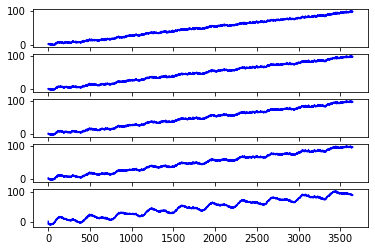

In [17]:
import math
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from numpy.linalg import inv
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd


N = 3650                        # Number of daily observations
t = np.linspace(0,N/365.25,N)  # time in years
np.random.seed(0)              # Assure we always get the same noise

trend = 10*t

theta = 30 #位相
Aseas = [[math.sqrt(1/2),math.sqrt(1/4)],[math.sqrt(2),1],[math.sqrt(3),math.sqrt(2)],[math.sqrt(8),2],[8,4]]

#  Flicker noise
kappa = -1              
h     = np.zeros(2*N)    #  Note the size : 2N
h[0]  = 1            #  Eq. (25)
for i in range(1,N):
    h[i] = (i-kappa/2-1)/i * h[i-1]
    
v      = np.zeros(2*N)   # Again zero-padded N:2N
v[0:N] = np.random.normal(loc = 0.0, scale = 1.0, size = N)

w = np.real(fft.ifft(fft.fft(v) * fft.fft(h))) 


fig = plt.figure()
axes= fig.subplots(len(Aseas))

ylist = [[] for _ in range(len(Aseas))]

for r in range(len(Aseas)):
  seasonal = np.zeros(N)
  for i in range(1,N):
      seasonal[i] = Aseas[r][0]*math.sin((2*math.pi*i)/365+theta) + Aseas[r][1]*math.sin((4*math.pi*i)/365+theta*2)

  y = trend + seasonal + w[0:N]   # trajectory model + noise

  now = dt.datetime.now()
  then = now + dt.timedelta(days=N)
  axes[r].plot(y, 'b-')
  ylist[r] = y

plt.show()

In [23]:
from google.colab import files
for i in range(len(ylist)):
  filename =  "synthetic_data_" + str(i) + ".csv"
  y_pd = pd.Series(ylist[i]) 
  y_pd .to_csv(filename, encoding = 'utf-8-sig') 
  files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>